In [1]:
# 書本範例： TensorFlow + Keras 深度學習人工智慧實務應用

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Read data from tensorflow
import tensorflow.examples.tutorials.mnist.input_data as input_data
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [5]:
def weight(shape):
    return tf.Variable(tf.truncated_normal(shape, stddev=0.1), name='W')

def bias(shape):
    return tf.Variable(tf.constant(0.1, shape=shape, name='b'))

def conv2d(x, W):
    return tf.nn.conv2d(x, W, strides=[1,1,1,1], padding='SAME')
    

def max_pool_2x2(x):
    return tf.nn.max_pool(x, ksize=[1,2,2,1], strides=[1,2,2,1], padding='SAME')

# ksize = [1, height, width, 1]
# strides = [1, stride, stride, 1]
# padding = 'SAME' , padding '0' for keeping same size 

In [7]:
# using 'tf.name_scope' function to build computational graph

# Input Layer
with tf.name_scope('Input_Layer'):
    x = tf.placeholder('float', shape=[None, 784], name='x')
    x_image = tf.reshape(x, [-1,28,28,1]) # if color image [-1,m,n,3]
    

# Convolution Layer 1
with tf.name_scope('C1_Conv'):
    W1 = weight([5,5,1,16])
    # [filter_h, filter_w, z_dim, number of filter]
    b1 = bias([16])
    Conv1 = conv2d(x_image, W1) + b1 # x_image as input
    C1_Conv = tf.nn.relu(Conv1 )
    # output shape 28x28x16
    
# Max pool Layer 1
with tf.name_scope('C1_Pool'):
    C1_Pool = max_pool_2x2(C1_Conv)
    # output shape 14x14x16

    
# Convolution Layer 2    
with tf.name_scope('C2_Conv'):
    W2 = weight([5,5,16,36])
    # [filter_h, filter_w, z_dim, number of filter]
    b2 = bias([36])
    Conv2=conv2d(C1_Pool, W2)+ b2
    C2_Conv = tf.nn.relu(Conv2)
    # output shape 14x14x36
    
    
# Max pool Layer 2
with tf.name_scope('C2_Pool'):
    C2_Pool = max_pool_2x2(C2_Conv) 
    # output shape 7x7x36
    
# Fully Connected Layer    
with tf.name_scope('D_Flat'):
    D_Flat = tf.reshape(C2_Pool, [-1, 1764])
    
    
# Hidden Layer
with tf.name_scope('D_Hidden_Layer'):
    W3= weight([1764, 128])
    b3= bias([128])
    D_Hidden = tf.nn.relu(tf.matmul(D_Flat, W3)+b3)
    D_Hidden_Dropout= tf.nn.dropout(D_Hidden, keep_prob=0.8)
    

# Output Layers
with tf.name_scope('Output_Layer'):
    W4 = weight([128,10])
    b4 = bias([10])
    y_predict= tf.nn.softmax(tf.matmul(D_Hidden_Dropout, W4)+b4)
    

# Set the optimizer method for training model
with tf.name_scope("optimizer"):
    y_label = tf.placeholder("float", shape=[None, 10],  name="y_label")
    
    loss_function = tf.reduce_mean(
                         tf.nn.softmax_cross_entropy_with_logits
                                    (logits=y_predict, labels=y_label)
                                   )
    optimizer = tf.train.AdamOptimizer(learning_rate=0.0001).minimize(loss_function)

In [8]:
# Accuracy
with tf.name_scope("evaluate_model"):
    correct_prediction = tf.equal(tf.argmax(y_predict, 1), tf.argmax(y_label, 1))
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))

In [11]:
# Set training parameters
trainEpochs = 5
batchSize = 100
totalBatchs = int(mnist.train.num_examples/batchSize) # iter of one epoch
epoch_list=[]
accuracy_list=[]
loss_list=[];

# Record time
from time import time
startTime=time()

In [12]:
# Using Session() to execute computational graph
sess = tf.Session()
sess.run(tf.global_variables_initializer())

# Traing Model 
for epoch in range(trainEpochs):
    # Period of epoch
    
    for i in range(totalBatchs):
        # iter times of each epoch
        batch_x, batch_y = mnist.train.next_batch(batchSize)
        sess.run(optimizer,feed_dict={x: batch_x, y_label: batch_y})
        # directly run optimizer to training model (run the computational graph)
        
    
    loss, acc = sess.run([loss_function, accuracy],
                          feed_dict={x: mnist.validation.images, 
                                     y_label: mnist.validation.labels}
                        )

    # Record 
    epoch_list.append(epoch)
    loss_list.append(loss)
    accuracy_list.append(acc)    
    
    # Print information
    print("Train Epoch:", '%02d' %(epoch+1),
          "Loss=","{:.9f}".format(loss),
          " Accuracy=",acc)
    
duration = time() - startTime
print("Train Finished takes:",duration)  

Train Epoch: 01 Loss= 1.577064395  Accuracy= 0.9062
Train Epoch: 02 Loss= 1.530471087  Accuracy= 0.9398
Train Epoch: 03 Loss= 1.511834741  Accuracy= 0.9558
Train Epoch: 04 Loss= 1.504901886  Accuracy= 0.9634
Train Epoch: 05 Loss= 1.497949004  Accuracy= 0.968
Train Finished takes: 875.8468298912048


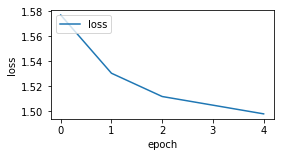

In [20]:
fig = plt.gcf()
fig.set_size_inches(4,2)
plt.plot(epoch_list, loss_list, label = 'loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['loss'], loc='upper left')

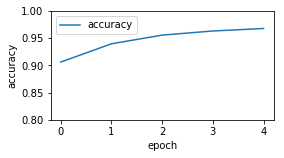

In [21]:
plt.plot(epoch_list, accuracy_list,label="accuracy" )
fig = plt.gcf()
fig.set_size_inches(4,2)
plt.ylim(0.8,1)
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend()
plt.show()

In [22]:
print("Accuracy:", 
      sess.run(accuracy,feed_dict={x: mnist.test.images,
                                   y_label: mnist.test.labels}))

Accuracy: 0.9637


In [23]:
prediction_result=sess.run(tf.argmax(y_predict,1),
                           feed_dict={x: mnist.test.images ,
                                      y_label: mnist.test.labels})

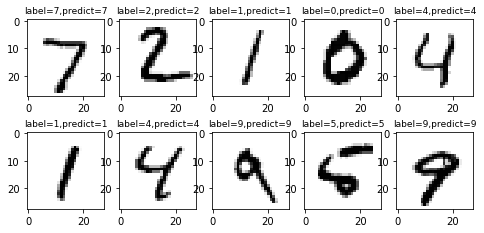

In [24]:
def show_images_labels_predict(images,labels,prediction_result):
    fig = plt.gcf()
    fig.set_size_inches(8, 10)
    for i in range(0, 10):
        ax=plt.subplot(5,5, 1+i)
        ax.imshow(np.reshape(images[i],(28, 28)), 
                  cmap='binary')
        ax.set_title("label=" +str(np.argmax(labels[i]))+
                     ",predict="+str(prediction_result[i])
                     ,fontsize=9) 
    plt.show()
    
# Run 'show_images_labels_predict'    
show_images_labels_predict(mnist.test.images,mnist.test.labels,prediction_result)

i=241   label= 9 predict= 8
i=247   label= 4 predict= 2
i=290   label= 8 predict= 4
i=318   label= 2 predict= 3
i=320   label= 9 predict= 1
i=321   label= 2 predict= 7
i=340   label= 5 predict= 3
i=403   label= 8 predict= 9
i=412   label= 5 predict= 3
i=448   label= 9 predict= 8
i=449   label= 3 predict= 5
i=479   label= 9 predict= 3
i=495   label= 8 predict= 0


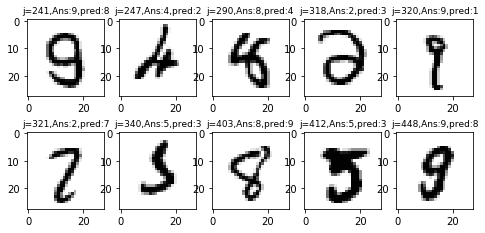

In [27]:
def show_images_labels_predict_error(images,labels,prediction_result):
    fig = plt.gcf()
    fig.set_size_inches(8, 10)
    i=0;j=0
    while i<10:
        if prediction_result[j]!=np.argmax(labels[j]):
            ax=plt.subplot(5,5, 1+i)
            ax.imshow(np.reshape(images[j],(28, 28)), 
                      cmap='binary')
            ax.set_title("j="+str(j)+
                         ",Ans:" +str(np.argmax(labels[j]))+
                         ",pred:"+str(prediction_result[j])
                         ,fontsize=9) 
            i=i+1  
        j=j+1
    plt.show()
    

for i in range(500):
    if prediction_result[i]!=np.argmax(mnist.test.labels[i]):
        print("i="+str(i)+
              "   label=",np.argmax(mnist.test.labels[i]),
              "predict=",prediction_result[i])

# Run 'show_images_labels_predict_error'
show_images_labels_predict_error(mnist.test.images,mnist.test.labels,prediction_result)        

In [26]:
saver = tf.train.Saver()
save_path = saver.save(sess, "saveModel/CNN_model1")
print("Model saved in file: %s" % save_path)
merged = tf.summary.merge_all()
train_writer = tf.summary.FileWriter('log/CNN',sess.graph)

#sess.close()

Model saved in file: saveModel/CNN_model1
